In [157]:
import numpy as np
import itertools as it


In [158]:
a = np.array([0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.2, 0.15, 0.08])
m = len(a)

In [159]:
def activation(a):
  l = len(a)
  for i in range(l):
    if ( a[i] < 0):
      a[i] = 0
    elif (a[i] >= 2):
      a[i] = 2
  return a

#Part 1

In [160]:
w1 = 0.5
w2 = -0.05

In [161]:
w = (w2*np.ones([m, m])) + ((w1 - w2) * np.identity(m))

In [162]:
print(w)

[[ 0.5  -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
 [-0.05  0.5  -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
 [-0.05 -0.05  0.5  -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
 [-0.05 -0.05 -0.05  0.5  -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
 [-0.05 -0.05 -0.05 -0.05  0.5  -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
 [-0.05 -0.05 -0.05 -0.05 -0.05  0.5  -0.05 -0.05 -0.05 -0.05 -0.05]
 [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05  0.5  -0.05 -0.05 -0.05 -0.05]
 [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05  0.5  -0.05 -0.05 -0.05]
 [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05  0.5  -0.05 -0.05]
 [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05  0.5  -0.05]
 [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05  0.5 ]]


In [163]:
t_max = 4
x_old = a.copy()
x_lst = []
x_lst.append(x_old)
for i in range(t_max):
  x_old = activation(np.dot(x_old, w))
  x_lst.append(x_old)

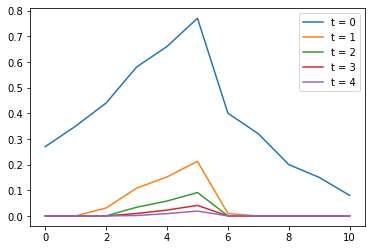

In [164]:
import matplotlib.pyplot as plt
for i in range(t_max + 1):
  plt.plot(x_lst[i])
sign = ['t = ' + str(i) for i in range(t_max + 1)]
plt.legend(sign)

#Part 2

In [165]:
def weight(r1, r2, w1, w2):
  w = np.zeros([m, m])
  for i in range(m):
    start_w1 = i - r1
    end_w1 = i + r1
    if (start_w1 <= 0):
      for k in range(0, end_w1 + 1):
        w[k, i] = w1
      for j in range(end_w1 + 1, end_w1 + r2):
        w[j, i] = w2
    elif (end_w1 >= m - 1):
      for k in range(start_w1, m):
        w[k, i] = w1
      for j in range(i - r2, start_w1):
        w[j, i] = w2
    else:
      for k in range(start_w1, end_w1 + 1):
        w[k, i] = w1
      if((i - r2) <= 0):
        for j in it.chain(range(0, start_w1), range(end_w1 + 1, end_w1 + r2)):
          w[j, i] = w2
      elif((i + r2 >= m -1)):
        for j in it.chain(range((i - r2), start_w1), range(end_w1 + 1, m)):
          w[j, i] = w2
      else:
        for j in it.chain(range((i - r2), start_w1), range(end_w1 + 1, end_w1 + r2)):
          w[j, i] = w2
  return w


In [166]:
R1 = 1
R2 = 3

t_max = 4
x_old = a.copy()
x_lst = []
x_lst.append(a)
w = weight(R1, R2, w1, w2) 
for i in range(t_max):
  x_old = activation(np.dot(x_old, w))
  x_lst.append(x_old)

In [167]:
print(w)

[[ 0.5   0.5  -0.05 -0.05  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.5   0.5   0.5  -0.05 -0.05  0.    0.    0.    0.    0.    0.  ]
 [-0.05  0.5   0.5   0.5  -0.05 -0.05  0.    0.    0.    0.    0.  ]
 [-0.05 -0.05  0.5   0.5   0.5  -0.05 -0.05  0.    0.    0.    0.  ]
 [ 0.   -0.05 -0.05  0.5   0.5   0.5  -0.05 -0.05  0.    0.    0.  ]
 [ 0.    0.   -0.05 -0.05  0.5   0.5   0.5  -0.05 -0.05  0.    0.  ]
 [ 0.    0.    0.   -0.05 -0.05  0.5   0.5   0.5  -0.05 -0.05  0.  ]
 [ 0.    0.    0.    0.   -0.05 -0.05  0.5   0.5   0.5  -0.05 -0.05]
 [ 0.    0.    0.    0.    0.   -0.05 -0.05  0.5   0.5   0.5  -0.05]
 [ 0.    0.    0.    0.    0.    0.   -0.05 -0.05  0.5   0.5   0.5 ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.05 -0.05  0.5   0.5 ]]


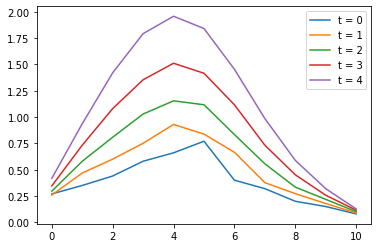

In [168]:
import matplotlib.pyplot as plt
for i in range(t_max + 1):
  plt.plot(x_lst[i])
sign = ['t = ' + str(i) for i in range(t_max + 1)]
plt.legend(sign)